# Breast Cancer Wisconsin (Diagnostic)

Target: Predict whether the cancer is benign or malignant

Source: https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

In this notebook, I will touch medicine in practice. I analyze breast cancer Wisconsin. It is a diagnostic data set.
I studied computer science in medicine, so now I would like to combine medical knowledge with machine learning.

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. Fine-needle aspiration (FNA) is a diagnostic procedure used to investigate lumps or masses. In this technique, a thin (23–25 gauge), hollow needle is inserted into the mass for sampling of cells that, after being stained, will be examined under a microscope (biopsy).

https://en.wikipedia.org/wiki/Fine-needle_aspiration

In [134]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 50)

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import xgboost as xgb
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials

from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn import linear_model
from sklearn.naive_bayes import GaussianNB

In [2]:
df = pd.read_csv('input/data.csv')
df.sample(10)

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
416    905978         B        9.405         21.70           59.60      271.2   
282     89122         M       19.400         18.18          127.20     1145.0   
341    898143         B        9.606         16.84           61.64      280.5   
176    872608         B        9.904         18.06           64.60      302.4   
247    884626         B       12.890         14.11           84.95      512.2   
389     90312         M       19.550         23.21          128.90     1174.0   
408  90524101         M       17.990         20.66          117.80      991.7   
228  88147202         B       12.620         23.97           81.35      496.4   
448    911150         B       14.530         19.34           94.25      659.7   
335  89742801         M       17.060         21.00          111.80      918.6   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
416          0.10440           0.06159         0.02047              0.01257   
282          0.10370           0.14420         0.16260              0.09464   
341          0.08481           0.09228         0.08422              0.02292   
176          0.09699           0.12940         0.13070              0.03716   
247          0.08760           0.13460         0.13740              0.03980   
389          0.10100           0.13180         0.18560              0.10210   
408          0.10360           0.13040         0.12010              0.08824   
228          0.07903           0.07529         0.05438              0.02036   
448          0.08388           0.07800         0.08817              0.02925   
335          0.11190           0.10560         0.15080              0.09934   

     symmetry_mean  fractal_dimension_mean  radius_se  texture_se  \
416         0.2025                 0.06601     0.4302      2.8780   
282         0.1893                 0.05892     0.4709      0.9951   
341         0.2036                 0.07125     0.1844      0.9429   
176         0.1669                 0.08116     0.4311      2.2610   
247         0.1596                 0.06409     0.2025      0.4402   
389         0.1989                 0.05884     0.6107      2.8360   
408         0.1992                 0.06069     0.4537      0.8733   
228         0.1514                 0.06019     0.2449      1.0660   
448         0.1473                 0.05746     0.2535      1.3540   
335         0.1727                 0.06071     0.8161      2.1290   

     perimeter_se  area_se  smoothness_se  compactness_se  concavity_se  \
416         2.759    25.17       0.014740         0.01674       0.01367   
282         2.903    53.16       0.005654         0.02199       0.03059   
341         1.429    12.07       0.005954         0.03471       0.05028   
176         3.132    27.48       0.012860         0.08808       0.11970   
247         2.393    16.35       0.005501         0.05592       0.08158   
389         5.383    70.10       0.011240         0.04097       0.07469   
408         3.061    49.81       0.007231         0.02772       0.02509   
228         1.445    18.51       0.005169         0.02294       0.03016   
448         1.994    23.04       0.004147         0.02048       0.03379   
335         6.076    87.17       0.006455         0.01797       0.04502   

     concave points_se  symmetry_se  fractal_dimension_se  radius_worst  \
416           0.008674      0.03044              0.004590         10.85   
282           0.014990      0.01623              0.001965         23.79   
341           0.008510      0.01750              0.004031         10.75   
176           0.024600      0.03880              0.017920         11.26   
247           0.013700      0.01266              0.007555         14.39   
389           0.034410      0.02768              0.006240         20.82   
408           0.014800      0.01414              0.003336         21.08   
228           0.008691      0.01365              0.003407      

### Basic intro

In [3]:
print(df.diagnosis.nunique())
df.diagnosis.unique()

2


array(['M', 'B'], dtype=object)

In [4]:
df['diagnosis_cat'] = pd.factorize(df['diagnosis'])[0]

In [5]:
df.shape

(569, 34)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 34 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [7]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32',
       'diagnosis_cat'],
      dtype='object')

In [8]:
df.isnull().any()

id                         False
diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_w

In [9]:
df = df.drop(['id', 'Unnamed: 32'], 1)

In [10]:
df.describe()

radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  fractal_dimension_mean   radius_se  texture_se  \
count     569.000000              569.000000  569.000000  569.000000   
mean        0.181162                0.062798    0.405172    1.216853   
std         0.027414                0.007060    0.277313    0.551648   
min         0.106000                0.049960    0.111500    0.360200   
25%         0.161900                0.057700    0.232400    0.833900   
50%         0.179200                0.061540    0.324200    1.108000   
75%         0.195700                0.066120    0.478900    1.474000   
max         0.304000                0.097440    2.873000    4.885000   

       perimeter_se     area_se  smoothness_se  compactness_se  concavity_se  \
count    569.000000  569.000000     569.000000      569.000000    569.000000   
mean       2.866059   40.337079       0.007041        0.025478      0.031894   
std        2.021855   45.491006       0.003003        0.017908      0.030186   
min        0.757000    6.802000       0.001713        0.002252      0.000000   
25%        1.606000   17.850000       0.005169        0.013080      0.015090   
50%        2.287000   24.530000       0.006380        0.020450      0.025890   
75%        3.357000   45.190000       0.008146        0.032450      0.042050   
max       21.980000  542.200000       0.031130        0.135400      0.396000   

       concave points_se  symmetry_se  fractal_dimension_se  radius_worst  \
count         569.000000   569.000000            569.000000    569.000000   
mean            0.011796     0.020542              0.003795     16.269190   
std             0.006170     0.008266              0.002646      4.833242   
min             0.000000     0.007882              0.000895      7.930000   
25%             0.007638     0.015160              0.002248     13.010000   
50%             0.010930     0.018730              0.003187     14.970000   
75%             0.014710     0.023480              0.004558     18.790000   
max             0.052790     0.078950              0.029840     36.040000   

       texture_worst  perimeter_worst   area_worst  smoothness_worst  \
count     569.000000       569.000000   569.000000        569.000000   
mean       25.677223       107.261213   880.583128          0.132369   
std         6.146258        33.602542   569.356993          0.022832   
min        12.020000        50.410000   185.200000          0.071170   
25%        21.080000        84.110000   515.300000          0.116600   
50%        25.410000        97.660000   686.500000          0.131300   
75%        29.720000       125.400000  1084.000000          0.146000   
max        49.540000       251.200000  4254.000000 

### Visualisations

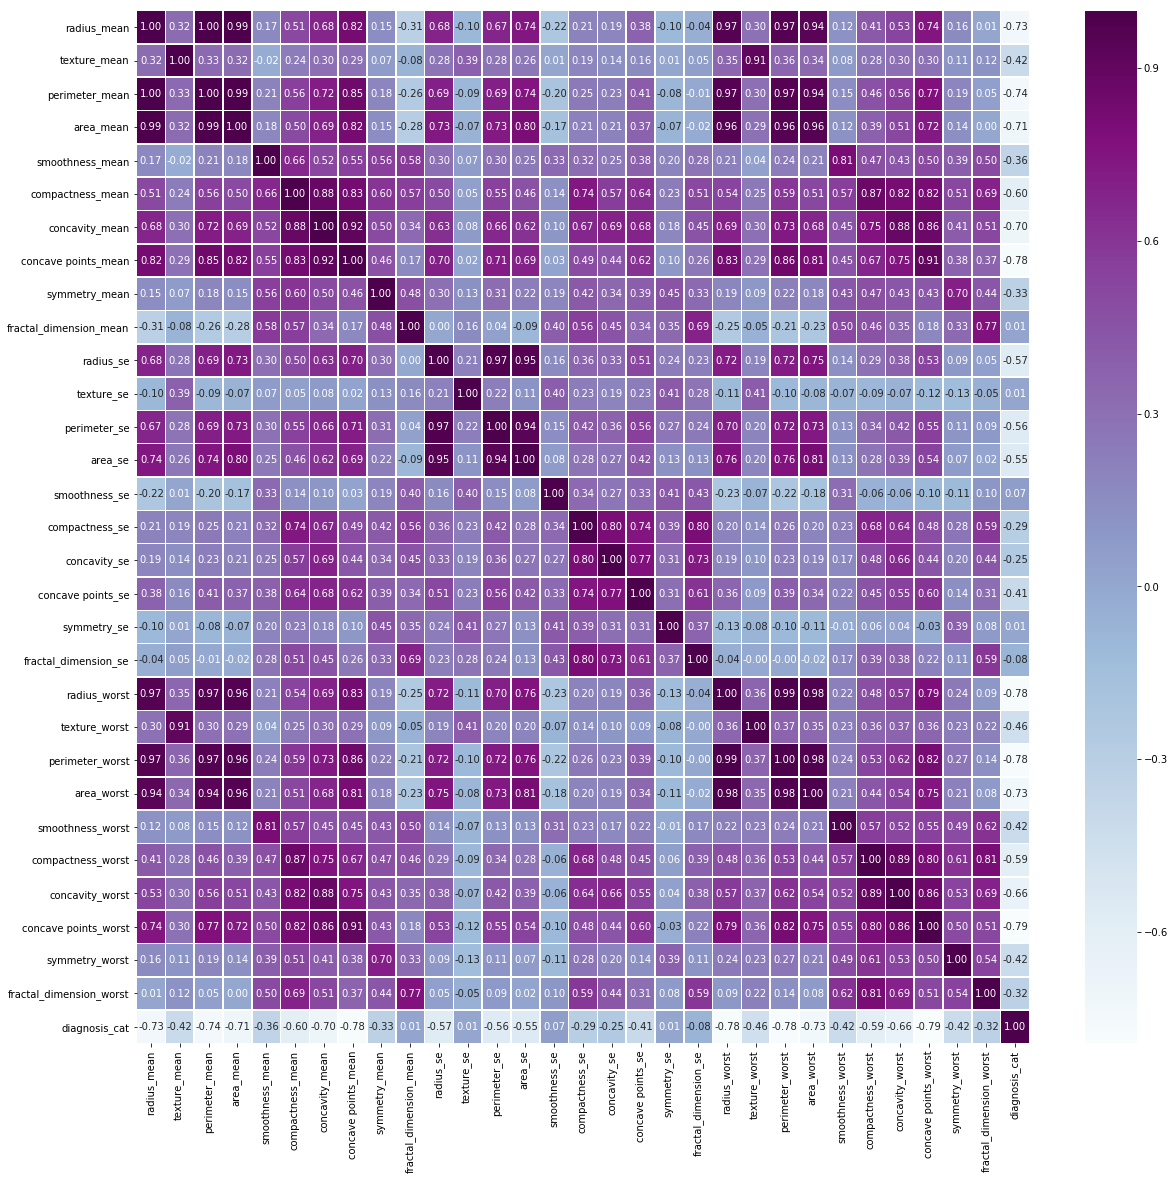

In [11]:
plt.rcParams['figure.figsize']=(20,19)
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt = ".2f", cmap="BuPu");

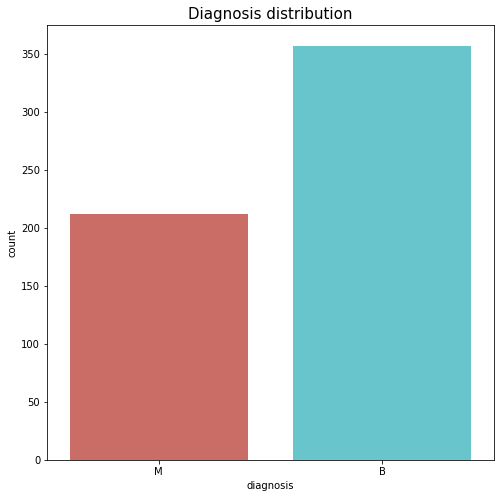

In [12]:
plt.rcParams['figure.figsize']=(8,8)
ax = sns.countplot(x = 'diagnosis', data = df, palette = 'hls');
ax.set_title(label='Diagnosis distribution', fontsize=15);

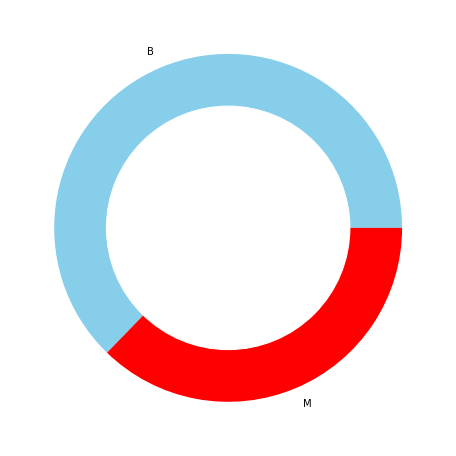

In [13]:
names= 'B', 'M'
size=df['diagnosis'].value_counts()

my_circle=plt.Circle((0,0), 0.7, color='white')

plt.pie(size, labels=names, colors=['skyblue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

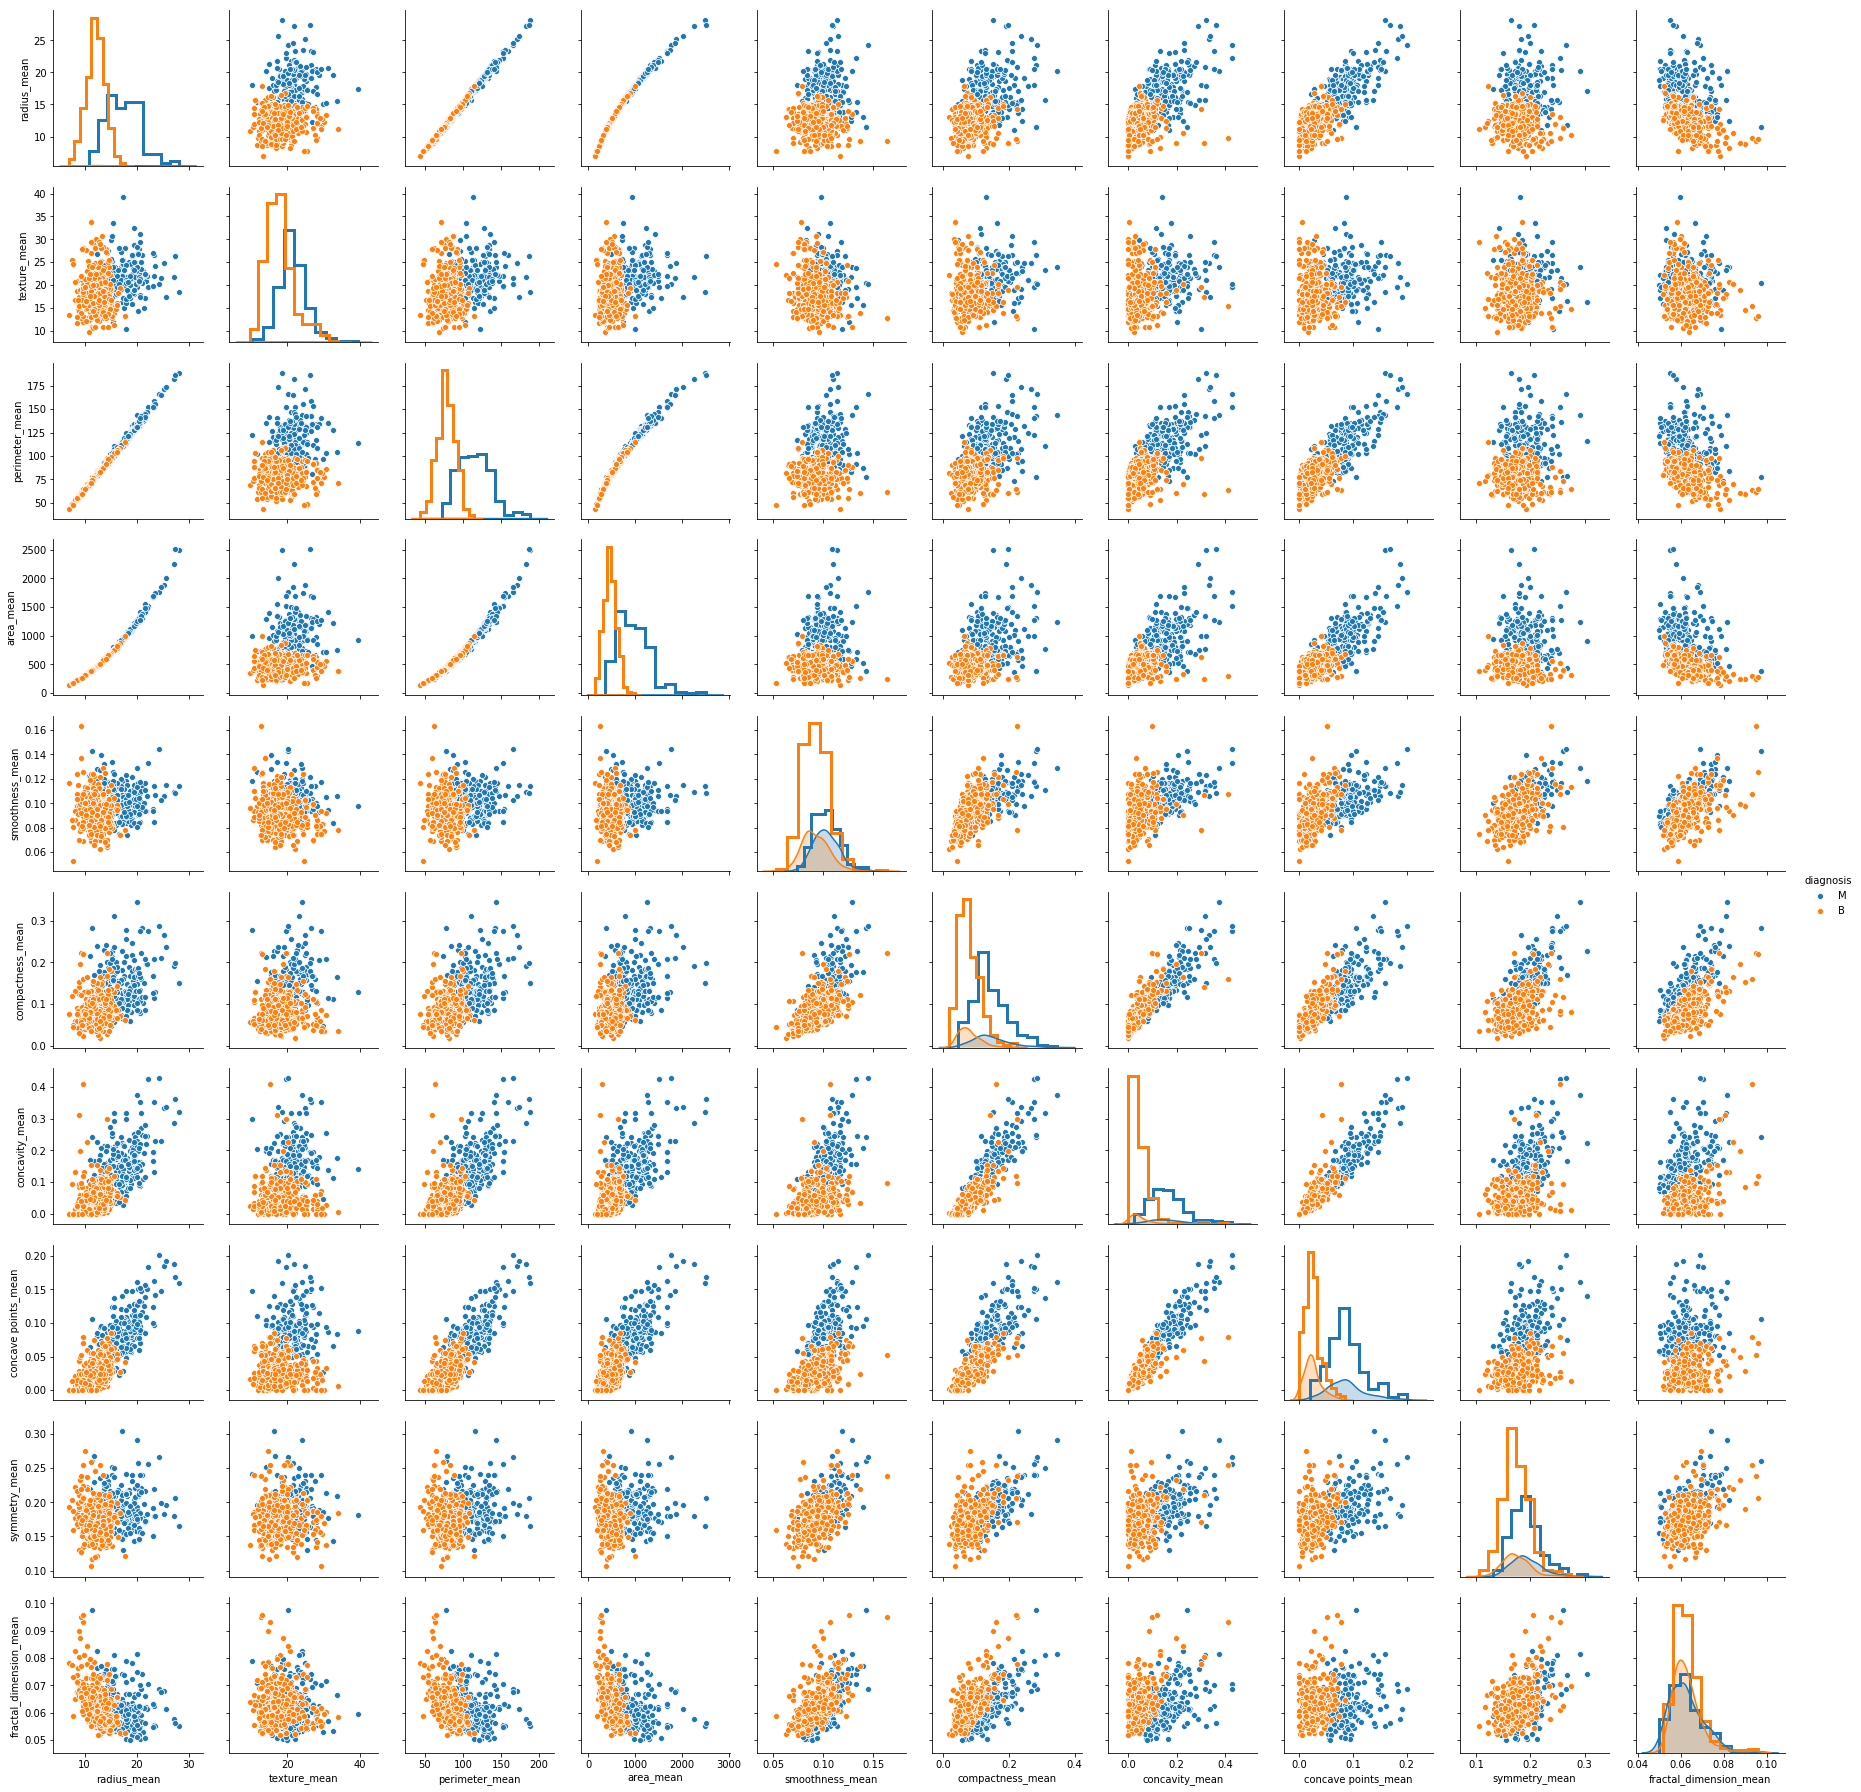

In [14]:
g = sns.pairplot(df.iloc[:,0:11], hue = 'diagnosis');
g = g.map_diag(plt.hist, histtype="step", linewidth=3)

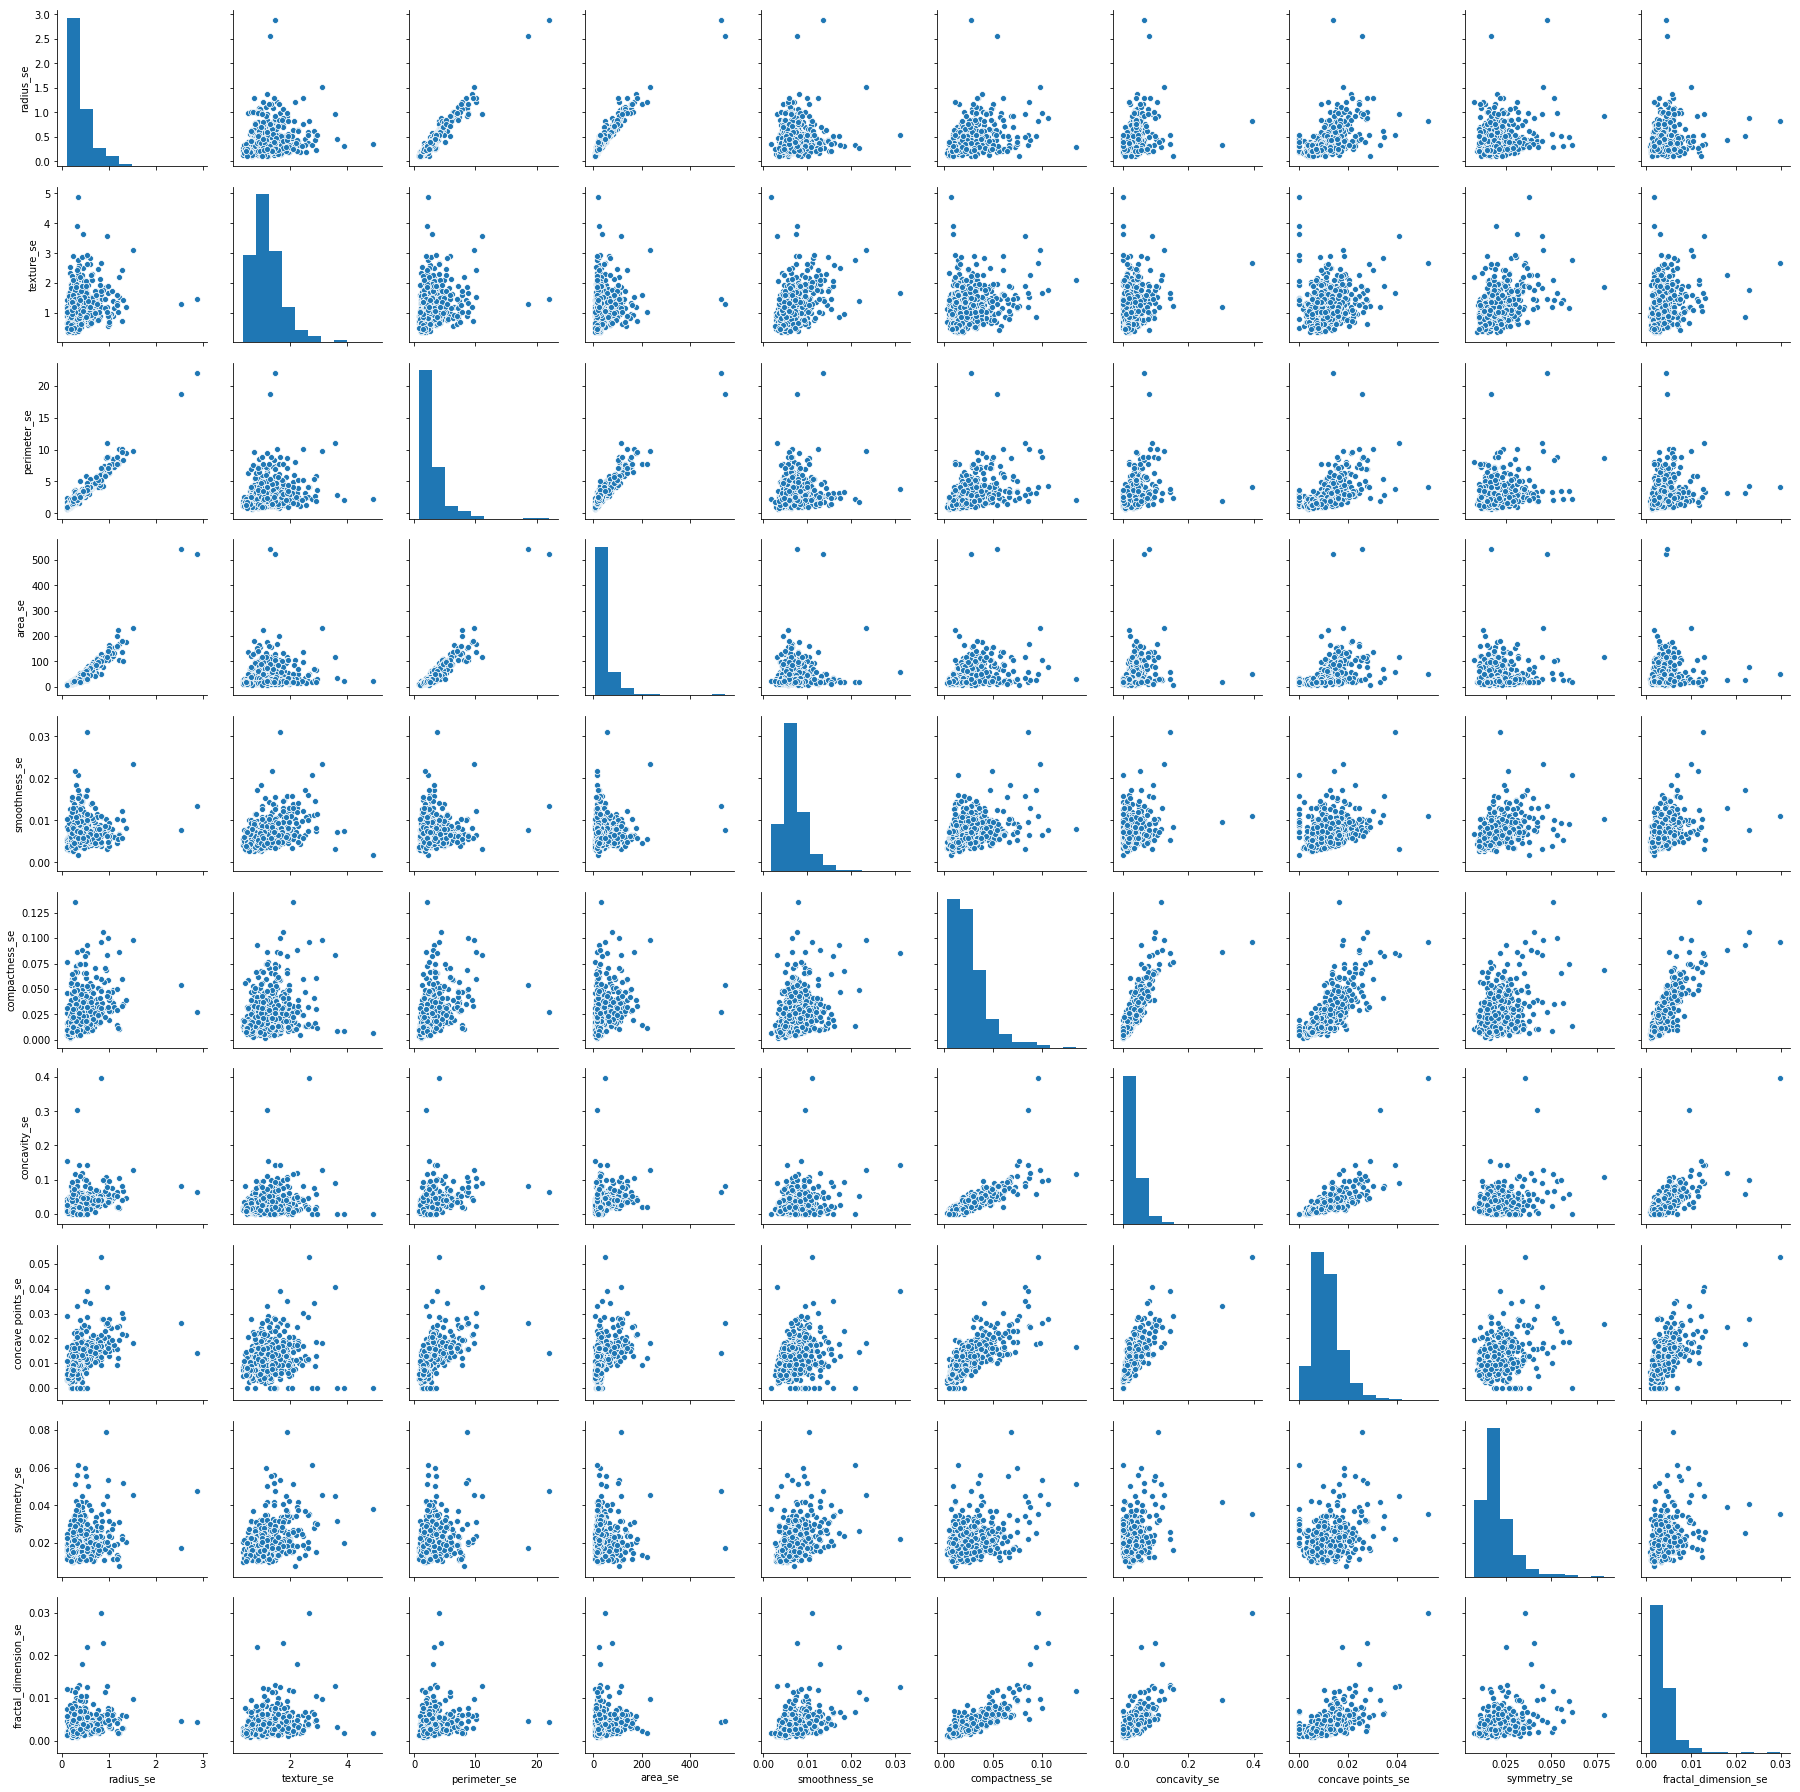

In [15]:
sns.pairplot(df.iloc[:,11:21]);

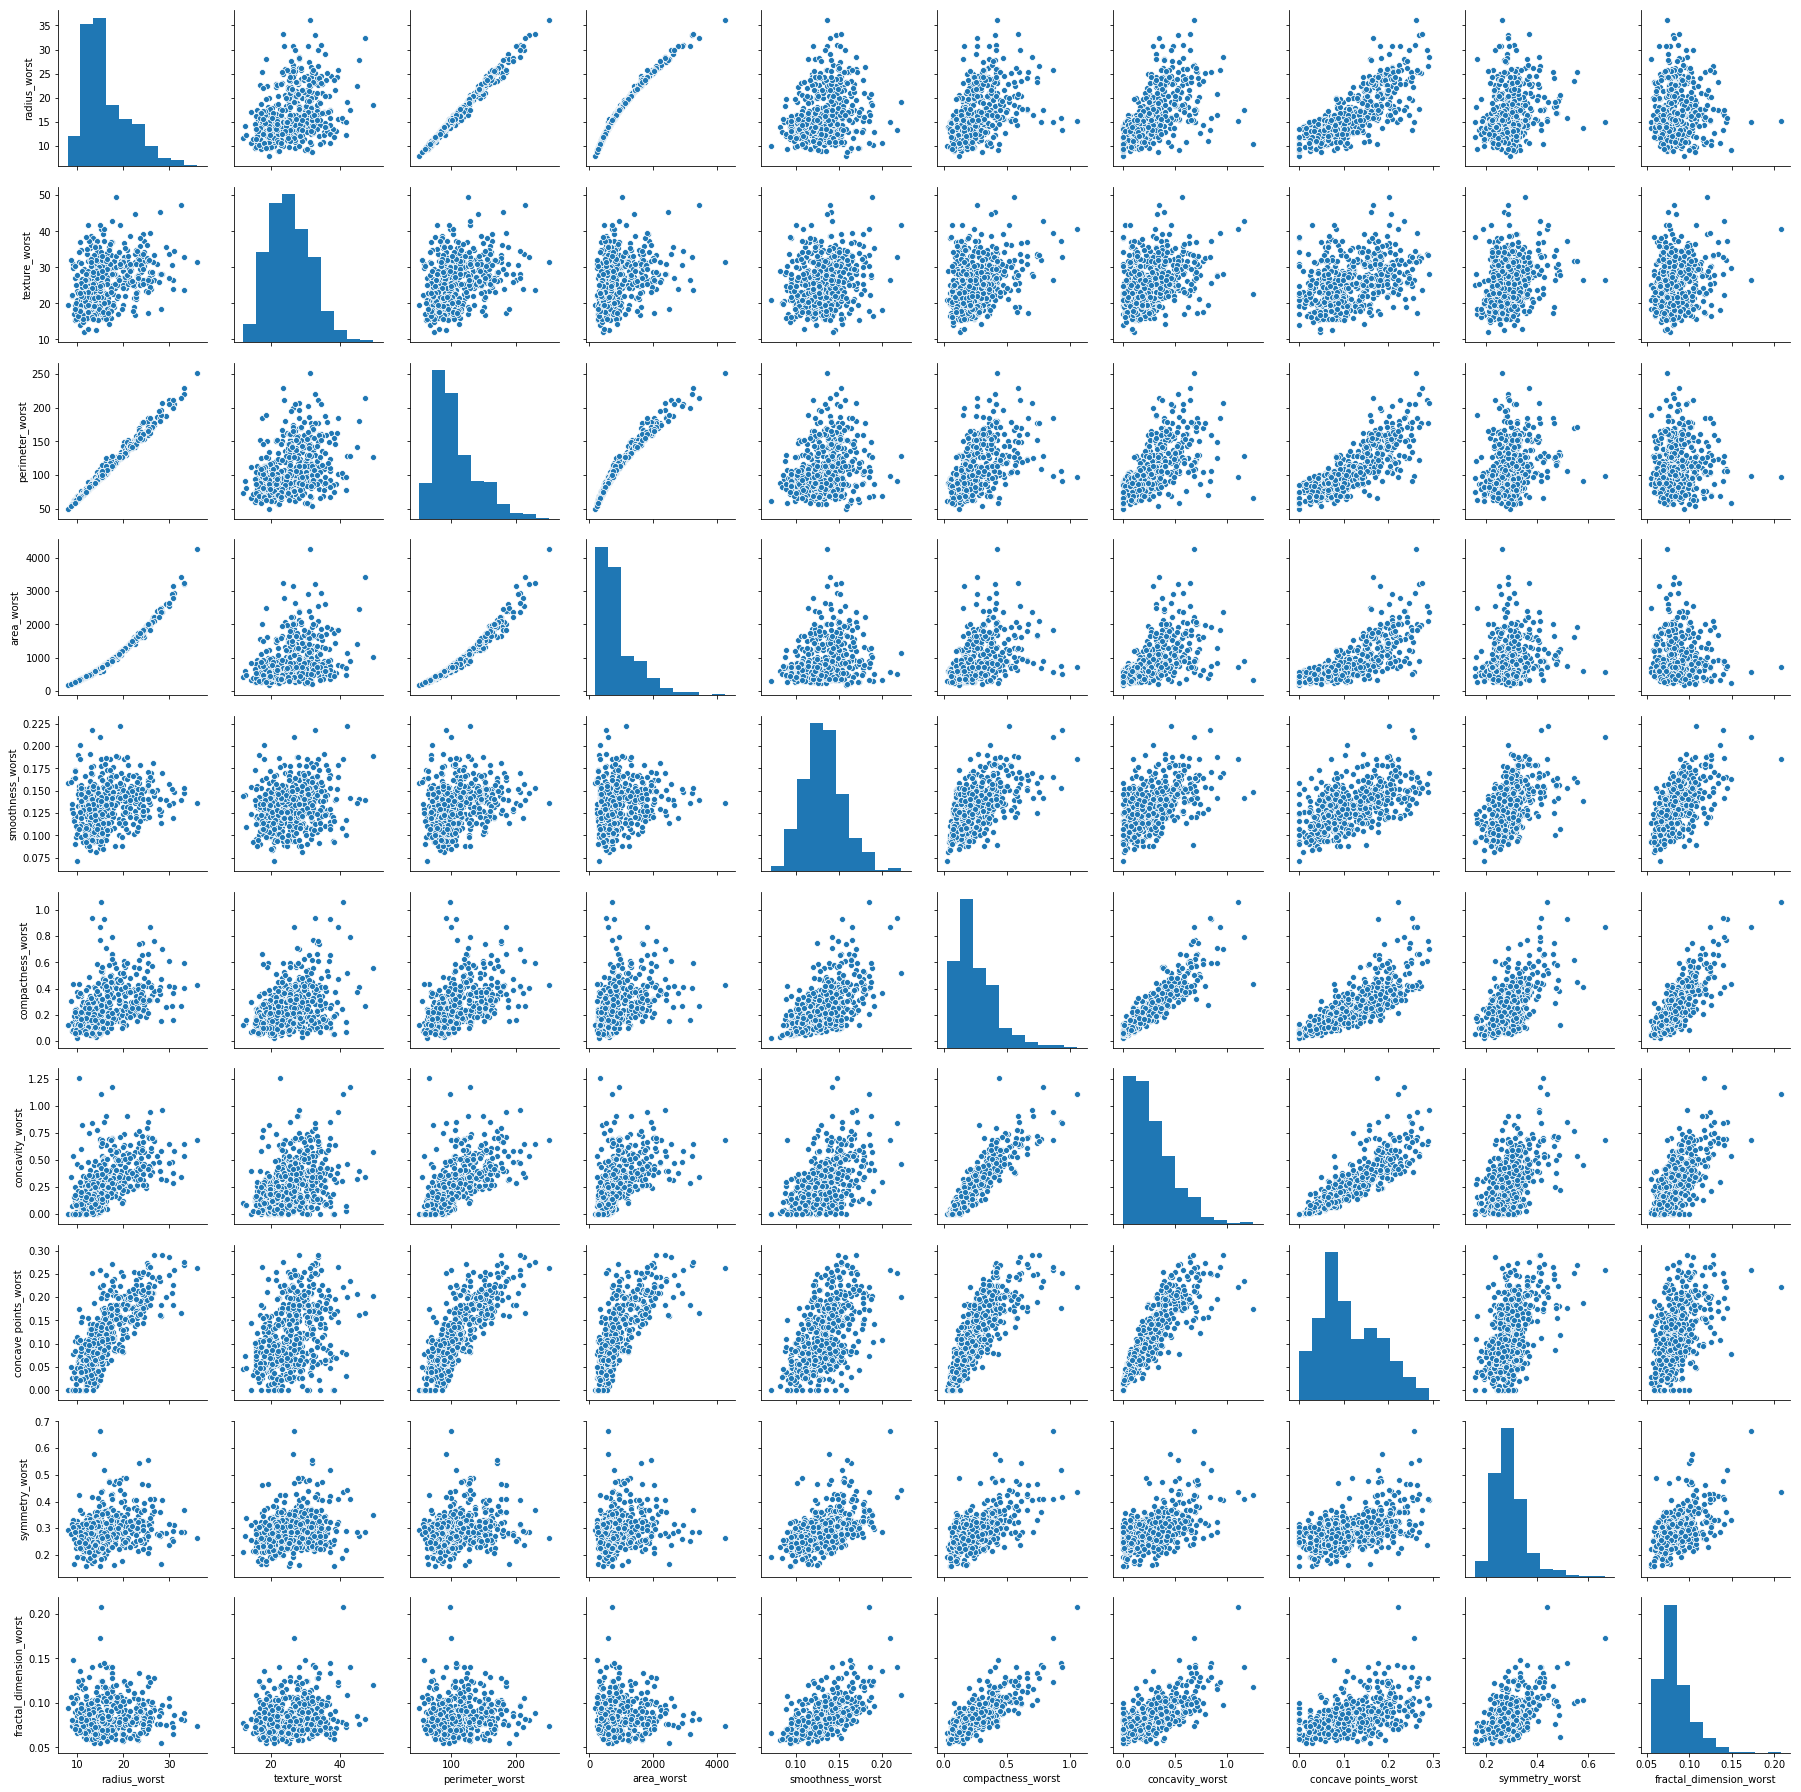

In [16]:
sns.pairplot(df.iloc[:,21:31]);

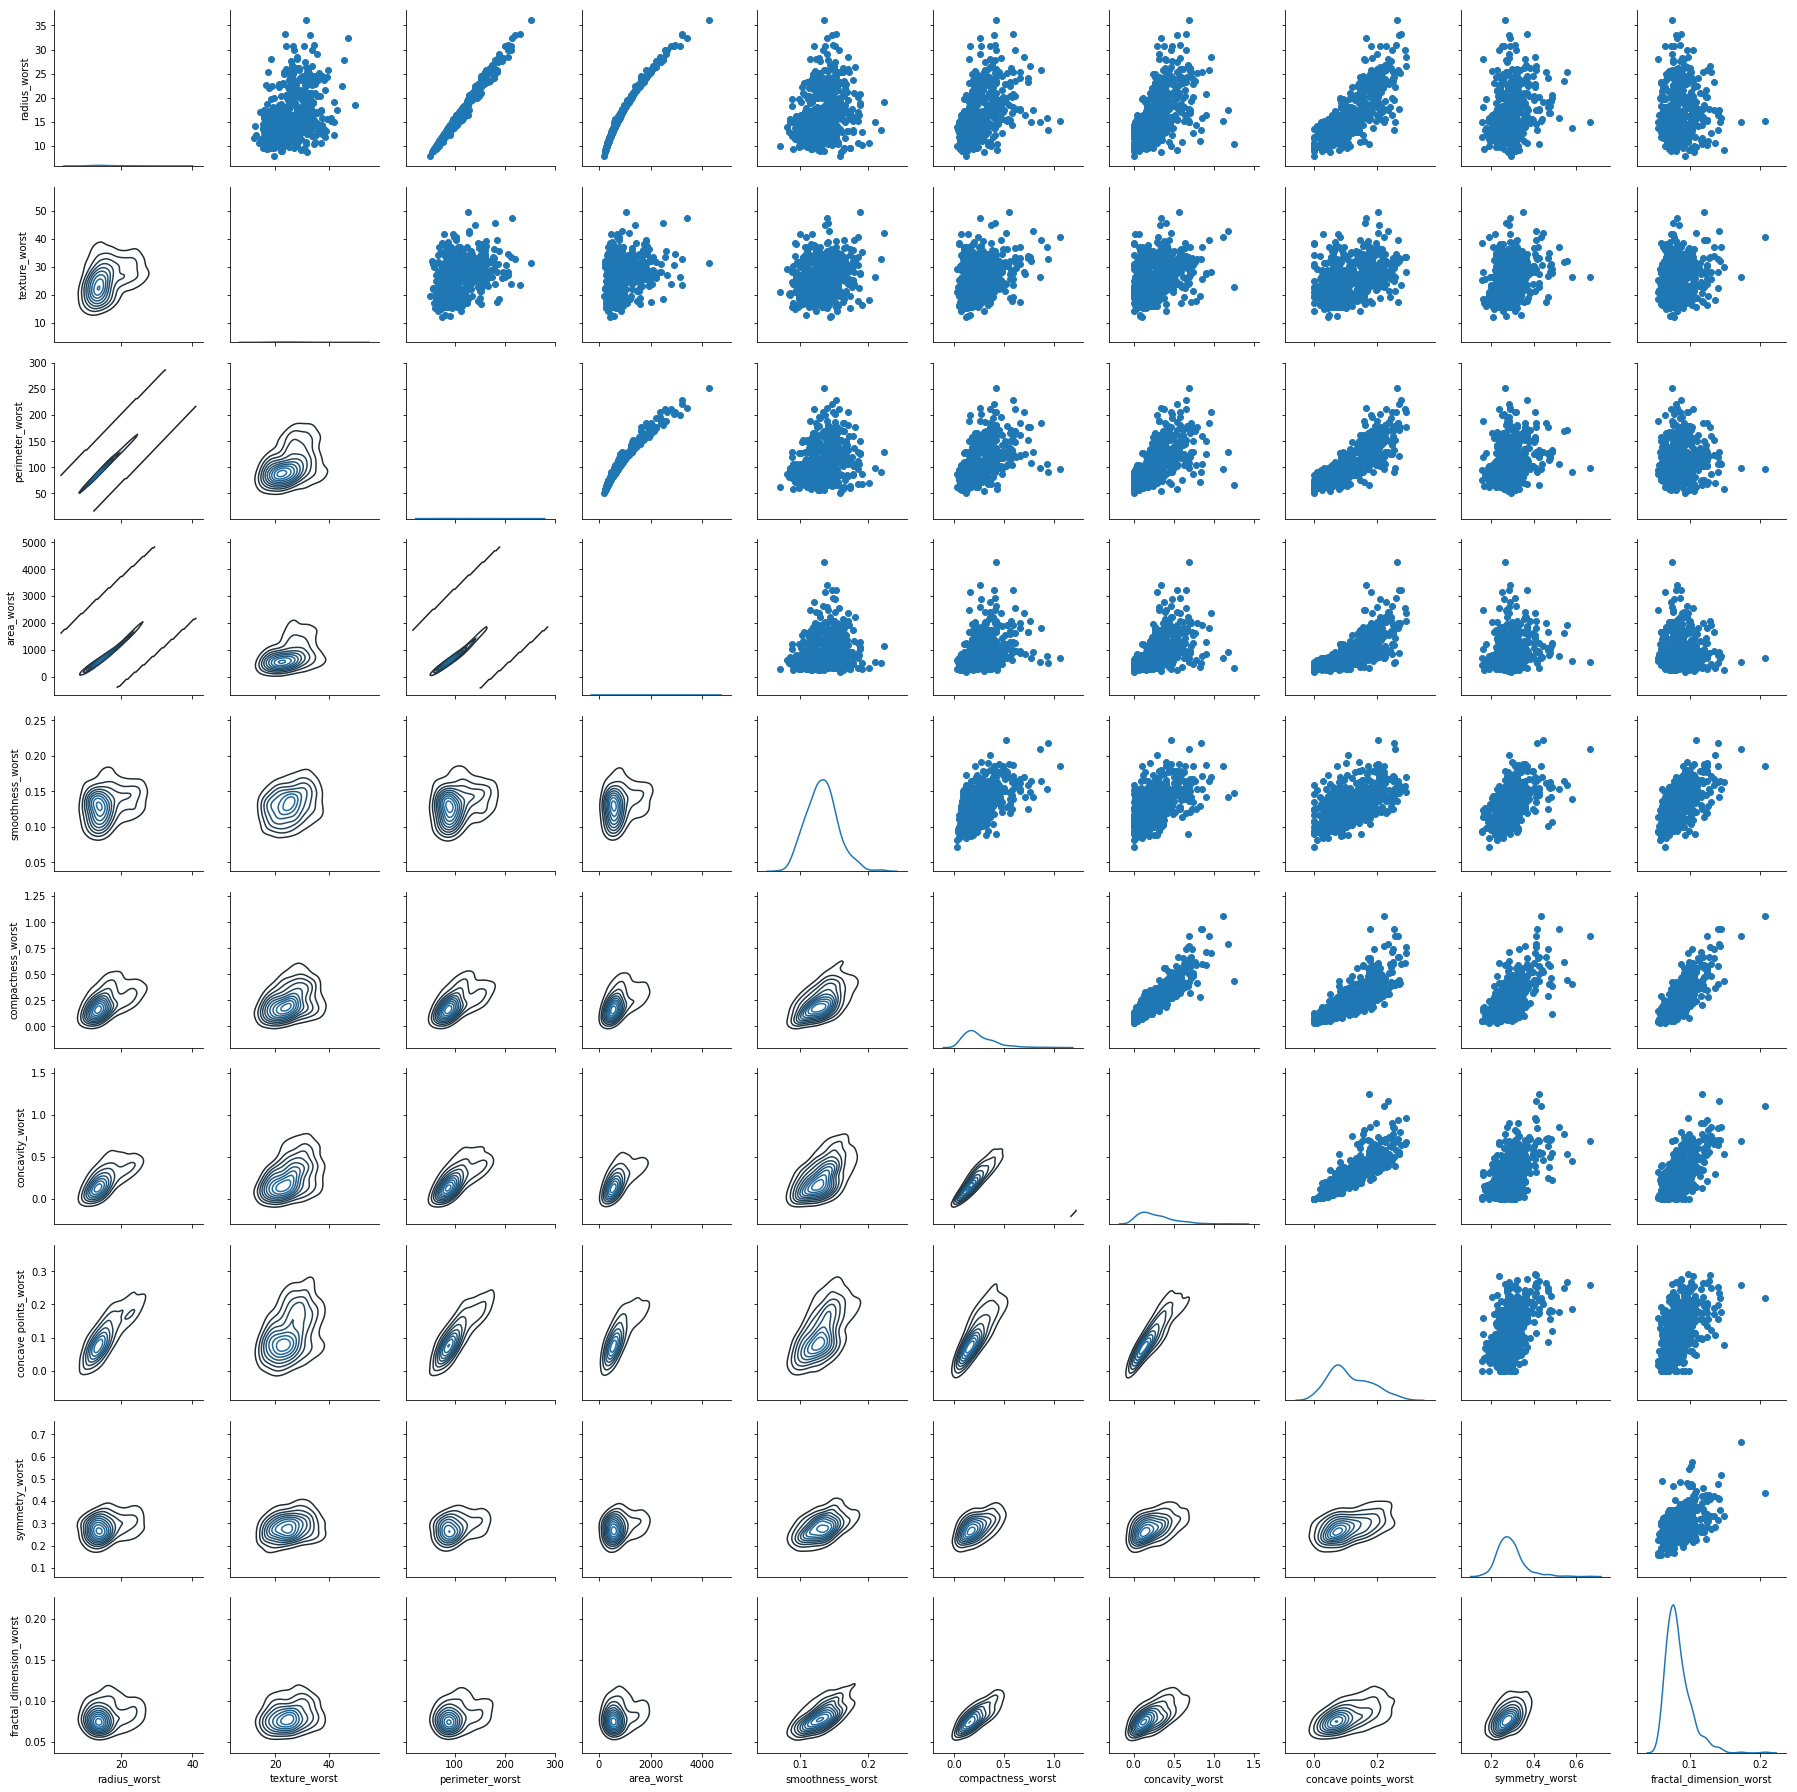

In [17]:
v = sns.PairGrid(df.iloc[:,21:31])
v.map_lower(sns.kdeplot);
v.map_upper(plt.scatter);
v.map_diag(sns.kdeplot);

In [18]:
def feats(df):
    feats_from_df = set(df.select_dtypes([np.int, np.float]).columns.values)
    bad_feats = {'diagnosis_cat'}
    return list(feats_from_df - bad_feats)

df_scaled = df
df_scaled[feats(df)] = preprocessing.scale(df[feats(df)])

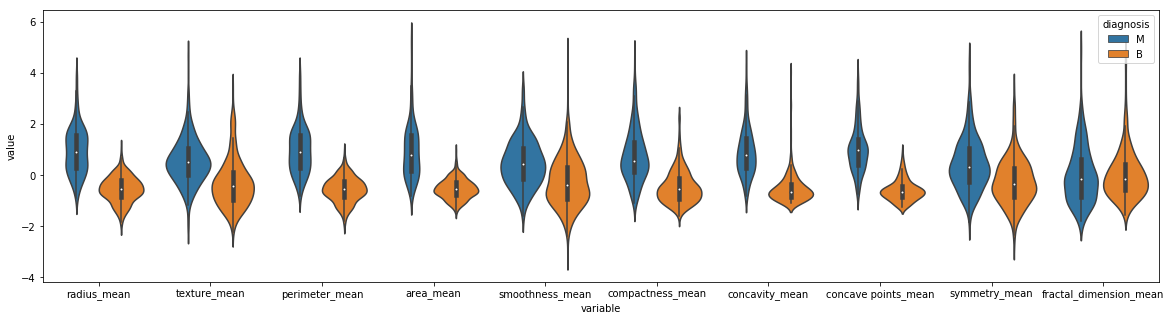

In [19]:
plt.subplots(figsize=(20,5))
df_melted = pd.melt(df_scaled, id_vars = "diagnosis", 
                      value_vars = ('radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
                                    'smoothness_mean', 'compactness_mean', 'concavity_mean',
                                    'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean'))
sns.violinplot(x = "variable", y = "value", hue="diagnosis",data= df_melted);

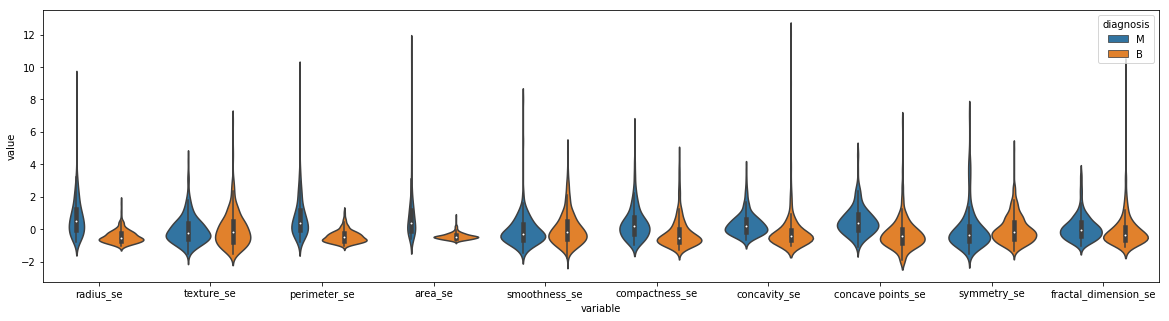

In [20]:
plt.subplots(figsize=(20,5))
df_melted = pd.melt(df_scaled, id_vars = "diagnosis", 
                      value_vars = ('radius_se', 'texture_se', 'perimeter_se', 'area_se',
                                    'smoothness_se', 'compactness_se', 'concavity_se',
                                    'concave points_se', 'symmetry_se', 'fractal_dimension_se'))
sns.violinplot(x = "variable", y = "value", hue="diagnosis",data= df_melted);

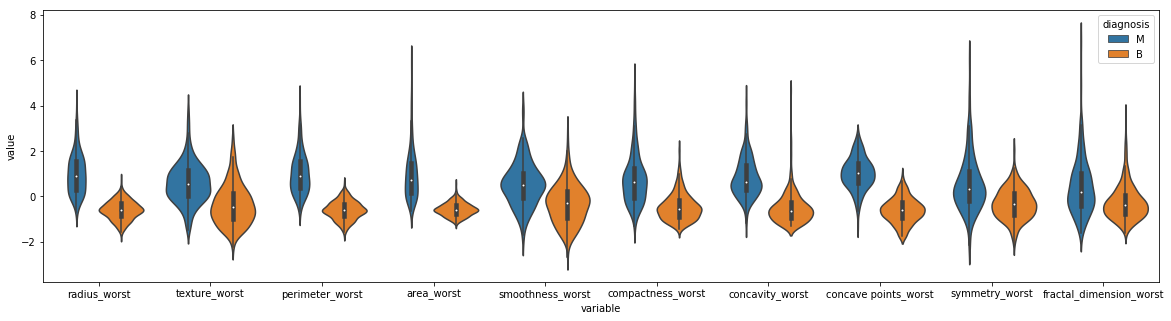

In [21]:
plt.subplots(figsize=(20,5))
df_melted = pd.melt(df_scaled, id_vars = "diagnosis", 
                      value_vars = ('radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
                                    'smoothness_worst', 'compactness_worst', 'concavity_worst',
                                    'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'))
sns.violinplot(x = "variable", y = "value", hue="diagnosis",data= df_melted);

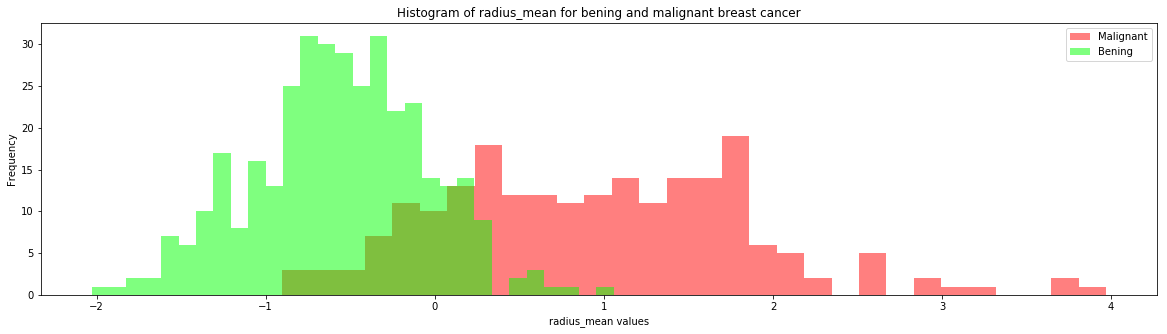

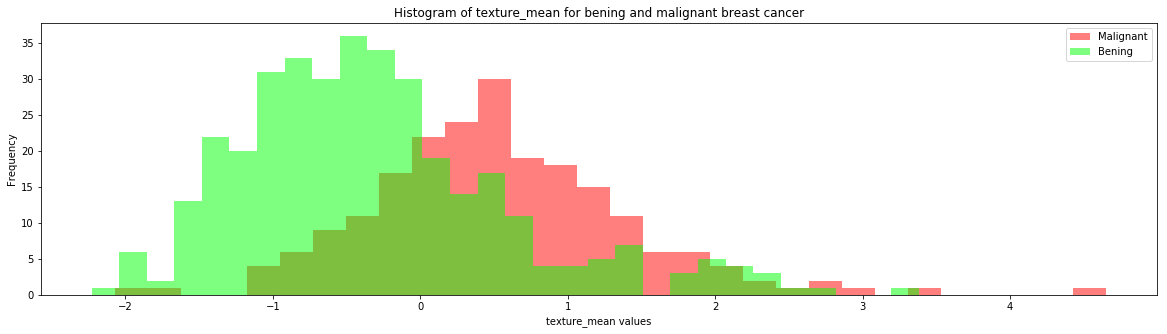

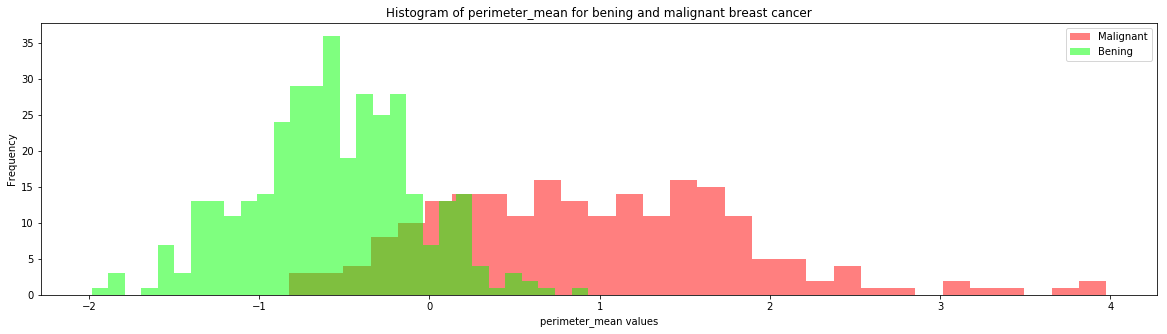

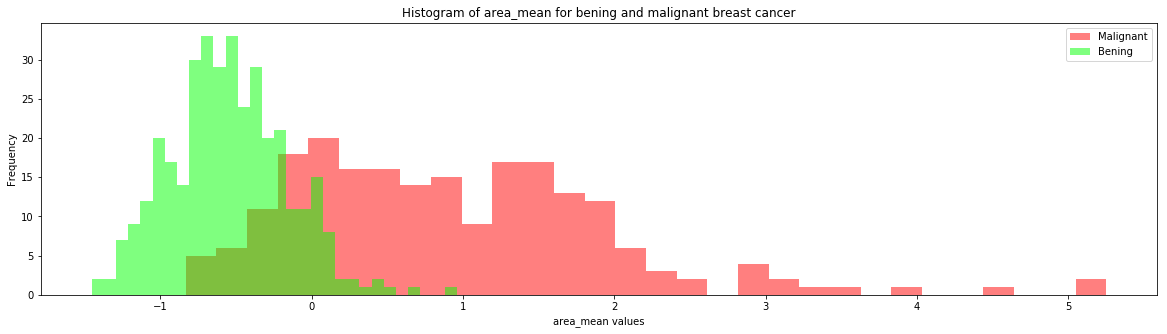

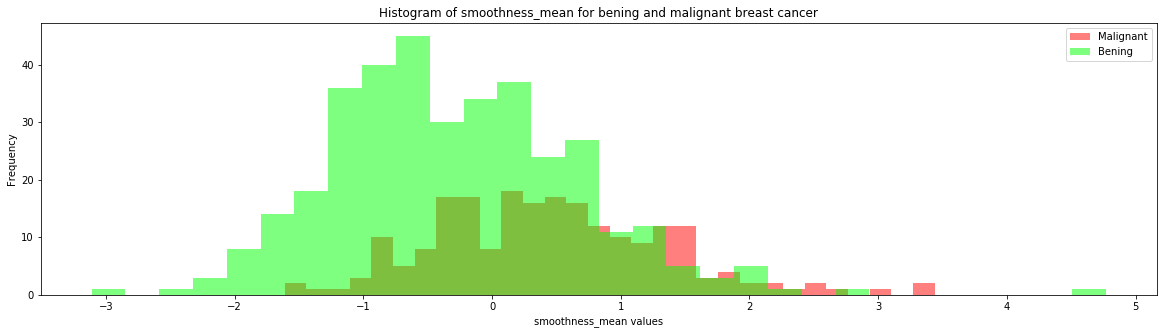

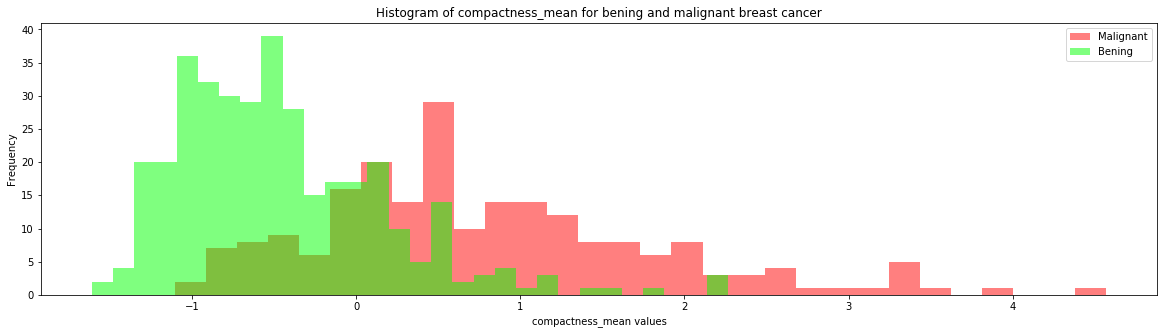

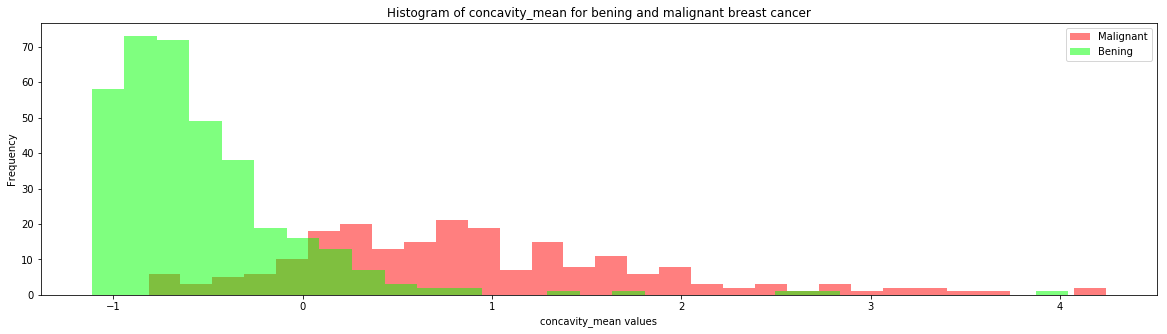

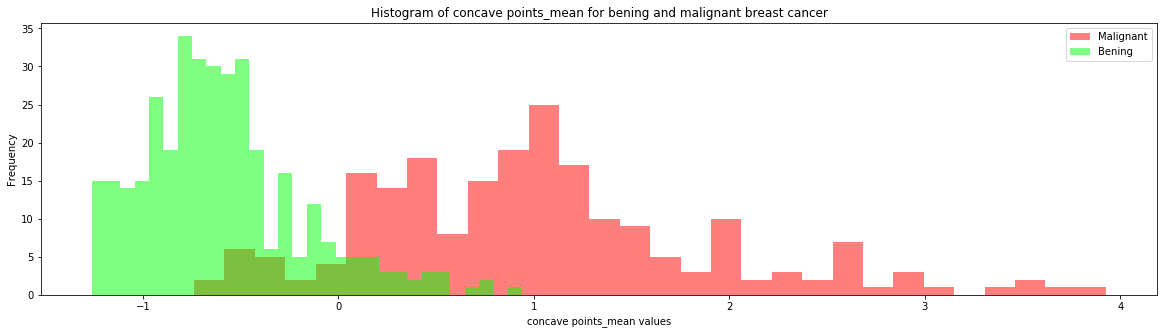

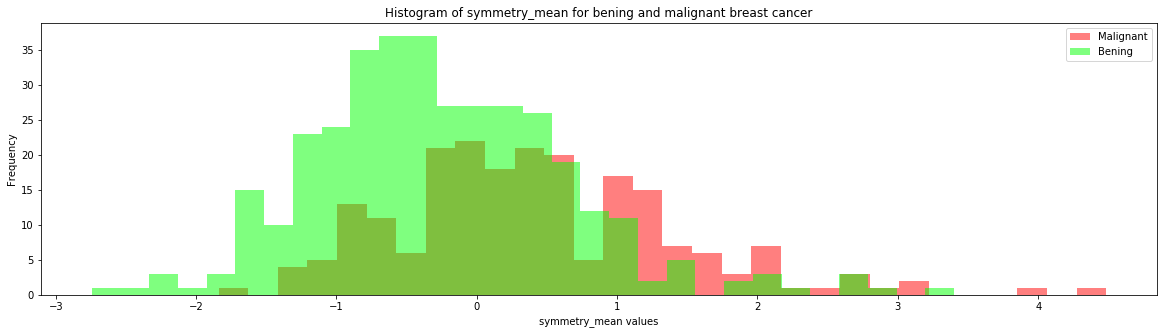

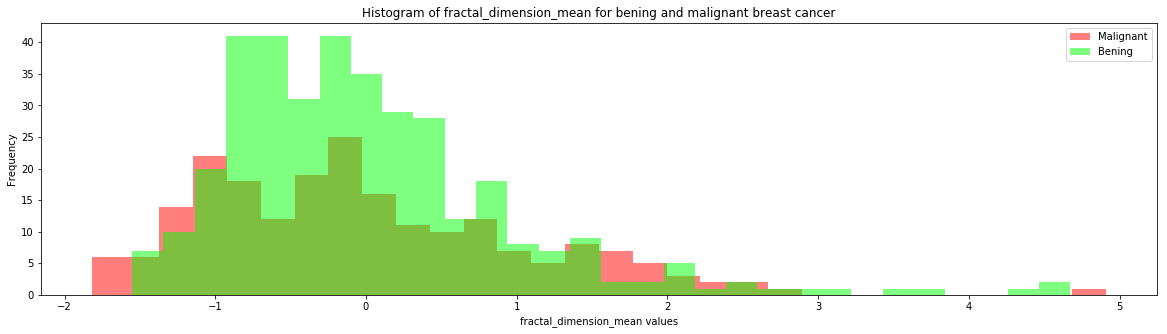

In [22]:
plt.rcParams['figure.figsize']=(20,5)

mean_value = ('radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
              'smoothness_mean', 'compactness_mean', 'concavity_mean',
               'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean')

for i, feat in enumerate(mean_value):
    m = plt.hist(df[df["diagnosis"] == "M"][feat],bins=30,fc = (1,0,0,0.5),label = "Malignant")
    b = plt.hist(df[df["diagnosis"] == "B"][feat],bins=30,fc = (0,1,0,0.5),label = "Bening")
    plt.legend()
    plt.xlabel(mean_value[i] + ' values')
    plt.ylabel("Frequency")
    plt.title("Histogram of " + mean_value[i] +  " for bening and malignant breast cancer")
    plt.show()

#### Conclusion

1. Dataset has no NaN value.
2. Target is predict wheather the cancer is. We have two type of answer: benign and malignant.
3. Target is categorial variable, so we must factorize it.
4. Dataset contains 10 features with their mean, se and worst dimension.
5. We saw that the dataset has outlayers so we make standarisation.
6. In dataset are correlated features, so we could make dimentional reduction.
7. In dataset are more benign nobservation than malgnant.
8. If we saw largest mean amount we have high probability, that the cancer is malignant. Especially parameters tell us about it: radius, perimeter, area, compactness, concavity.
Smoothness, symmetry show bening cancer.

### Models!

In [23]:
def feats(df):
    feats_from_df = set(df.select_dtypes([np.int, np.float]).columns.values)
    bad_feats = {'diagnosis', 'diagnosis_cat'}
    return list(feats_from_df - bad_feats)

def model_train_predict(model, X, y, success_metric=accuracy_score):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    return success_metric(y_val, y_pred)

def plot_learning_curve(model, title, X, y, ylim=None, cv = None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    
    plt.figure(figsize=(12,8))
    plt.title(title)
    if ylim is not None:plt.ylim(*ylim)

    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Testing score")

    plt.legend(loc="best")
    return plt

In [24]:
X = df_scaled[feats(df_scaled)].values
y = df_scaled['diagnosis_cat']

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False): 
CPU times: user 6.88 ms, sys: 0 ns, total: 6.88 ms
Wall time: 6.04 ms
0.9824561403508771



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


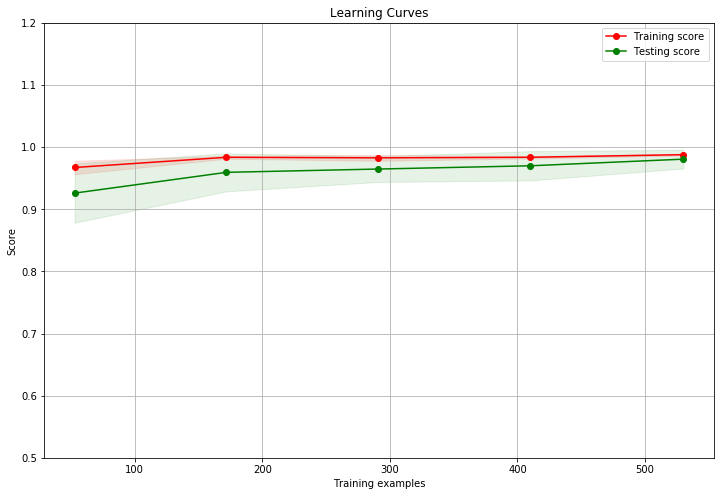

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'): 
CPU times: user 8 ms, sys: 0 ns, total: 8 ms
Wall time: 7.68 ms
0.9298245614035088



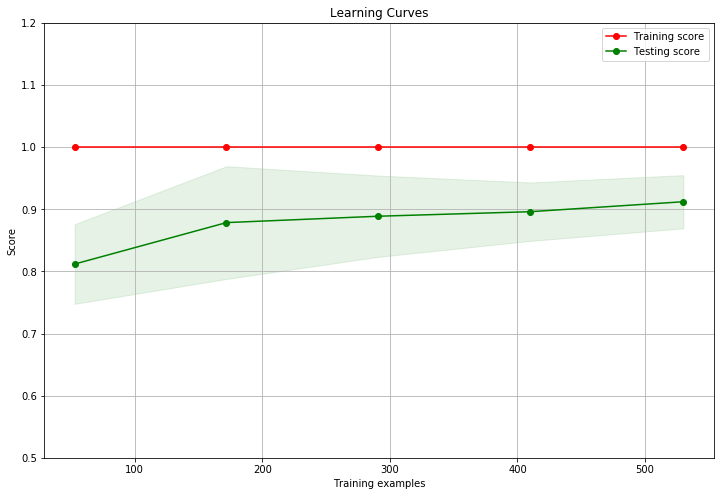

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False): 
CPU times: user 16.6 ms, sys: 350 µs, total: 17 ms
Wall time: 17.5 ms
0.956140350877193



/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


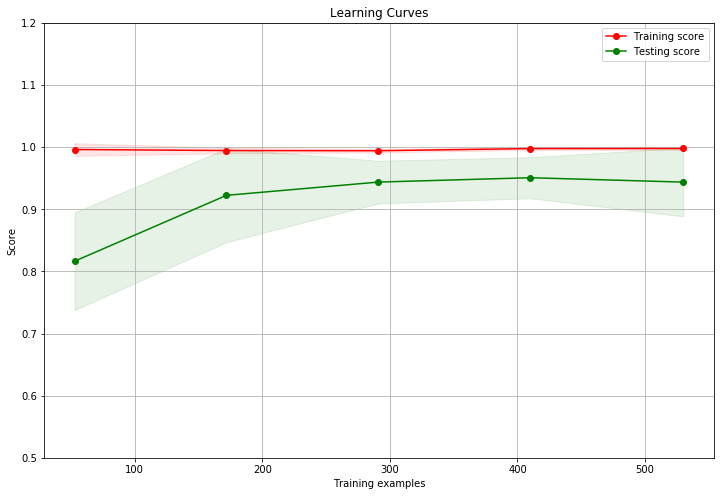

In [25]:
models = [
    LogisticRegression(penalty = 'l2'),
    DecisionTreeClassifier(max_depth=10),
    RandomForestClassifier(max_depth=10)
]

for model in models:
    print(str(model) + ": ")
    %time score = model_train_predict(model, X, y)
    print(str(score) + "\n")
    plt = plot_learning_curve(model, "Learning Curves", X, y, ylim=(0.5, 1.2), cv=15, n_jobs=4)
    plt.show()

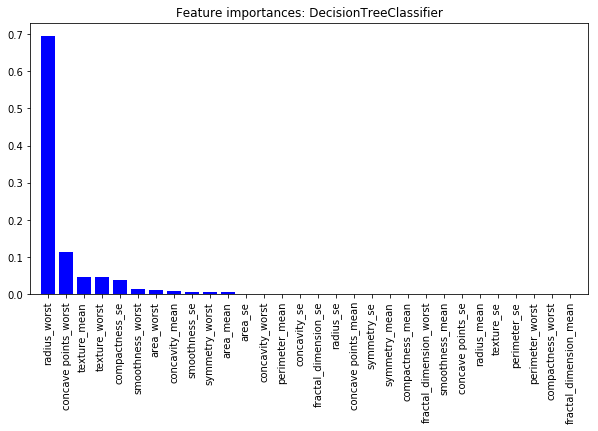

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


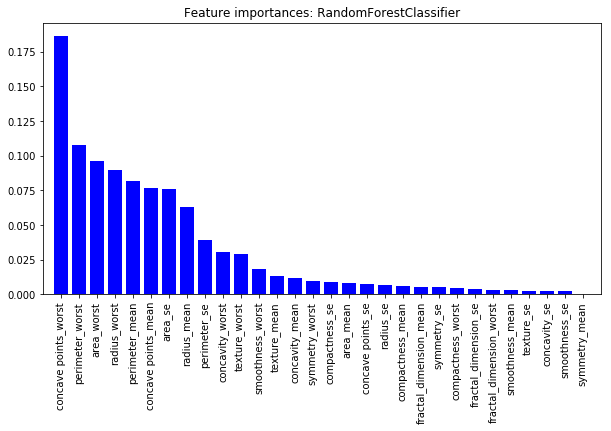

In [26]:
models = [
    DecisionTreeClassifier(max_depth=10),
    RandomForestClassifier(max_depth=10)
]

for model in models:
    model.fit(X, y)
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    plt.figure(figsize=(10, 5))
    plt.title('Feature importances: ' + str(model).split('(')[0])
    plt.bar(range(X.shape[1]), model.feature_importances_[indices],
           color = 'b', align = 'center')
    plt.xticks(range(X.shape[1]), [ feats(df_scaled)[x] for x in indices])
    plt.xticks(rotation=90)
    plt.xlim([-1, X.shape[1]])
    plt.show()

In [28]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
def compute(params):
    model = xgb.XGBClassifier(**params)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_val)
    score = accuracy_score(y_val, y_pred)
    #print("Score: %.2f" % score)
    #print(params)
    return (1 - score)

space = {
        'max_depth':  hp.choice('max_depth', range(4,6)),
        'min_child_weight': hp.uniform('min_child_weight', 0, 10),
        'subsample': hp.quniform('subsample', 0.5, 1, 0.05),
        'gamma': hp.quniform('gamma', 0.5, 1, 0.05)
    }

best = fmin(compute, space, algo=tpe.suggest, max_evals=250)
print(best)

{'gamma': 0.6000000000000001, 'max_depth': 1, 'min_child_weight': 3.8462404563411035, 'subsample': 0.9500000000000001}


In [29]:
model = xgb.XGBClassifier(**best)
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
accuracy_score(y_val, y_pred)

0.9473684210526315

In [42]:
def confusion_matrix(y_true,y_predict):
    confusion_matrix = metrics.confusion_matrix(y_true, y_predict)

    plt.figure(figsize=(5,5))
    ax= plt.subplot()
    sns.heatmap(confusion_matrix, annot=True,fmt='g', ax = ax);
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix'); 
    plt.show()

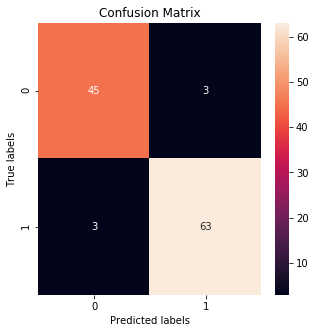

In [43]:
confusion_matrix(y_val, y_pred)

AUC: 0.946


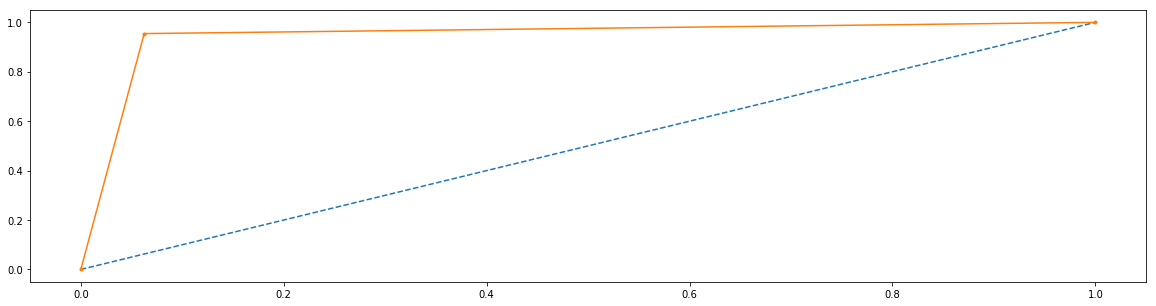

In [78]:
auc = roc_auc_score(y_val, y_pred)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(y_val, y_pred)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [100]:
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train)
X_val_pca = pca.fit_transform(X_val)

model_pca = LogisticRegression()
model_pca.fit(X_val_pca, y_val)
model_pca.score(X_val_pca, y_val)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9736842105263158

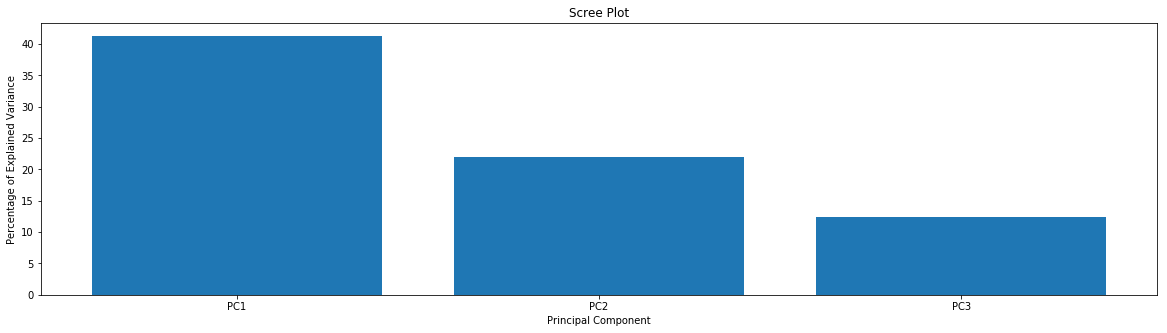

In [112]:
per_var = np.round(pca.explained_variance_ratio_*100, decimals = 1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

plt.bar(x=range(1, len(per_var)+1), height = per_var, tick_label = labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

In [102]:
df_pca = pd.DataFrame(data = X_train_pca, columns = ['PCA_1', 'PCA_2', 'PCA_3'])
df_pca = pd.concat([df_pca, df_scaled['diagnosis']], axis =1)

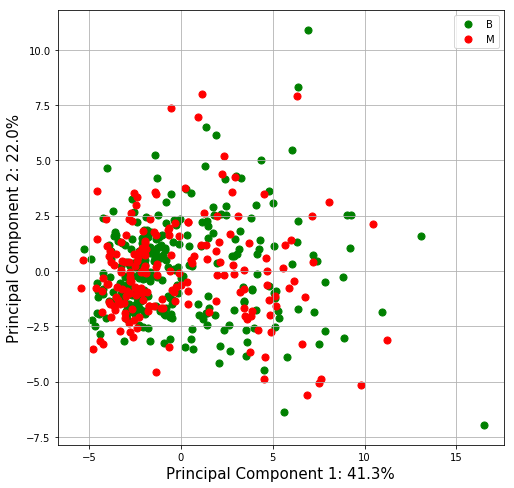

In [117]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1: {0}%'.format(per_var[0]), fontsize = 15)
ax.set_ylabel('Principal Component 2: {0}%'.format(per_var[1]), fontsize = 15)

targets = ['B', 'M']
colors = ['g', 'r',]
for target, color in zip(targets,colors):
    indicesToKeep = df_pca['diagnosis'] == target
    ax.scatter(df_pca.loc[indicesToKeep, 'PCA_1']
               , df_pca.loc[indicesToKeep, 'PCA_2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [121]:
model = SVC(gamma='auto')
model.fit(X_train, y_train)
model.score(X_val, y_val)

0.9736842105263158

In [128]:
model = LinearSVC(random_state=0, tol=1e-5)
model.fit(X_train, y_train)
model.score(X_val, y_val)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.9649122807017544

In [131]:
model = linear_model.SGDClassifier(max_iter=1000, tol=1e-3)
model.fit(X_train, y_train)
model.score(X_val, y_val)

0.9649122807017544

In [135]:
model = GaussianNB()
model.fit(X_train, y_train)
model.score(X_val, y_val)

0.9385964912280702